# EDA

### Una vez realizado el ETL y la union de ambos dataset se procede a realizar el EDA del dataset y verificar que informacion nos brindan los datos 

In [103]:

import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
data = pd.read_csv('C:\project_mlops\datasets\data_final.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45346 non-null  float64
 2   genres                 45346 non-null  object 
 3   id_movie               45346 non-null  int64  
 4   original_language      45335 non-null  object 
 5   overview               44405 non-null  object 
 6   popularity             45346 non-null  float64
 7   production_companies   45346 non-null  object 
 8   production_countries   45346 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45346 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

In [72]:
# Ordenar el DataFrame por popularidad en orden descendente
peliculas_populares = data.sort_values(by='popularity', ascending=False)

# Mostrar las 10 películas más populares
top_10_populares = peliculas_populares.head(12)
print(top_10_populares[['title', 'popularity']])

                                    title  popularity
0                                 Minions  547.488298
1                            Wonder Woman  294.337037
2                    Beauty and the Beast  287.253654
3                             Baby Driver  228.032744
4                              Big Hero 6  213.849907
5                                Deadpool  187.860492
6          Guardians of the Galaxy Vol. 2  185.330992
7                                  Avatar  185.070892
8                               John Wick  183.870374
9                               Gone Girl  154.801009
10  The Hunger Games: Mockingjay - Part 1  147.098006
11         War for the Planet of the Apes  146.161786


C:\Users\felix\AppData\Local\Temp\ipykernel_30804\3744938388.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta_colores = plt.cm.get_cmap('Blues', num_barras)


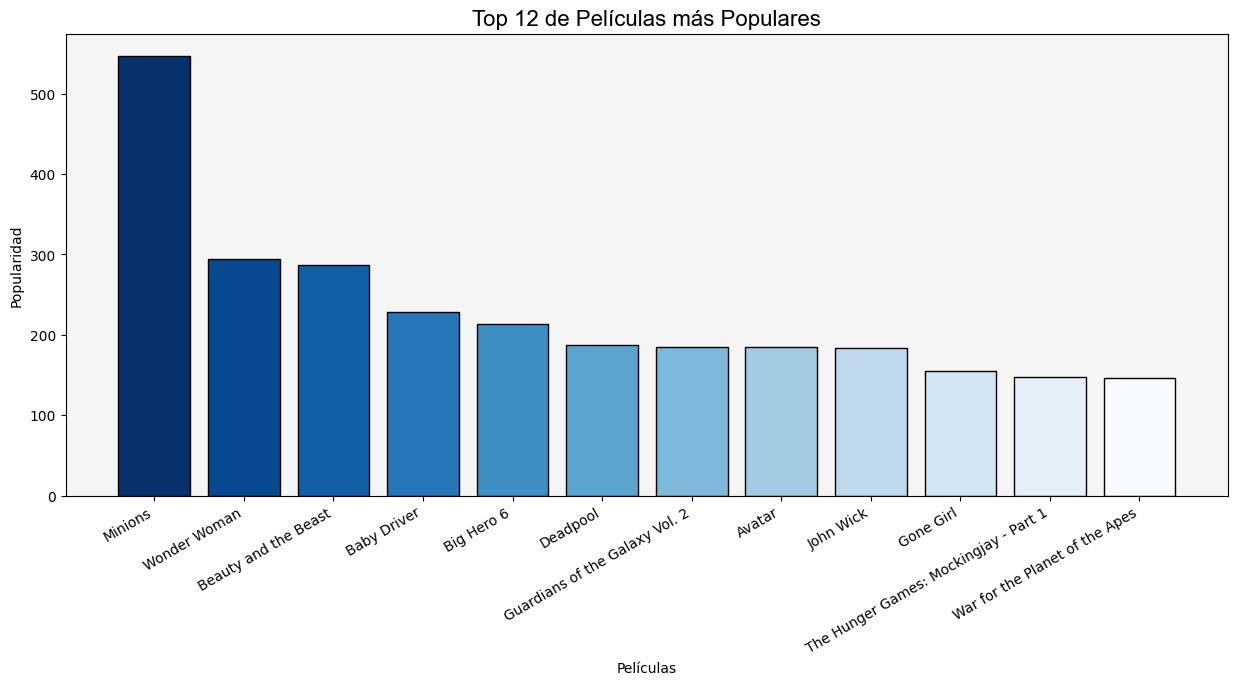

In [75]:
# Crear una figura
fig, ax = plt.subplots(figsize=(15, 6))

# Definir el color de fondo
color_fondo = '#F5F5F5'  # Gris tenue
ax.set_facecolor(color_fondo)
# Definir el color base para las barras
color_base = 'steelblue'
# Generar una paleta de colores gradual invertida
num_barras = len(top_10_populares)
paleta_colores = plt.cm.get_cmap('Blues', num_barras)
paleta_colores = paleta_colores.reversed()

# Crear el gráfico de barras con colores graduales invertidos
for i in range(num_barras):
    color = paleta_colores(i/num_barras)
    ax.bar(top_10_populares['title'].iloc[i], top_10_populares['popularity'].iloc[i],
           color=color, edgecolor='black')

# Configurar los labels del eje x en diagonal
plt.xticks(rotation=30, ha='right')

ax.set_ylabel('Popularidad')
ax.set_xlabel('Películas')

# Agregar título al gráfico
plt.title('Top 12 de Películas más Populares' , fontsize=16, fontname='Arial')

plt.show()

In [37]:
# Ordenar el DataFrame por recuento de votos en orden descendente
peliculas_votadas = data.sort_values(by='vote_count', ascending=False)

# Obtener las 10 películas con mayor recuento de votos
top_10_votadas = peliculas_votadas.head(10)
print(top_10_votadas[['title', 'vote_count']])

                       title  vote_count
120                Inception     14075.0
15           The Dark Knight     12269.0
7                     Avatar     12114.0
17              The Avengers     12000.0
5                   Deadpool     11444.0
91              Interstellar     11187.0
280         Django Unchained     10297.0
32   Guardians of the Galaxy     10014.0
27                Fight Club      9678.0
264         The Hunger Games      9634.0


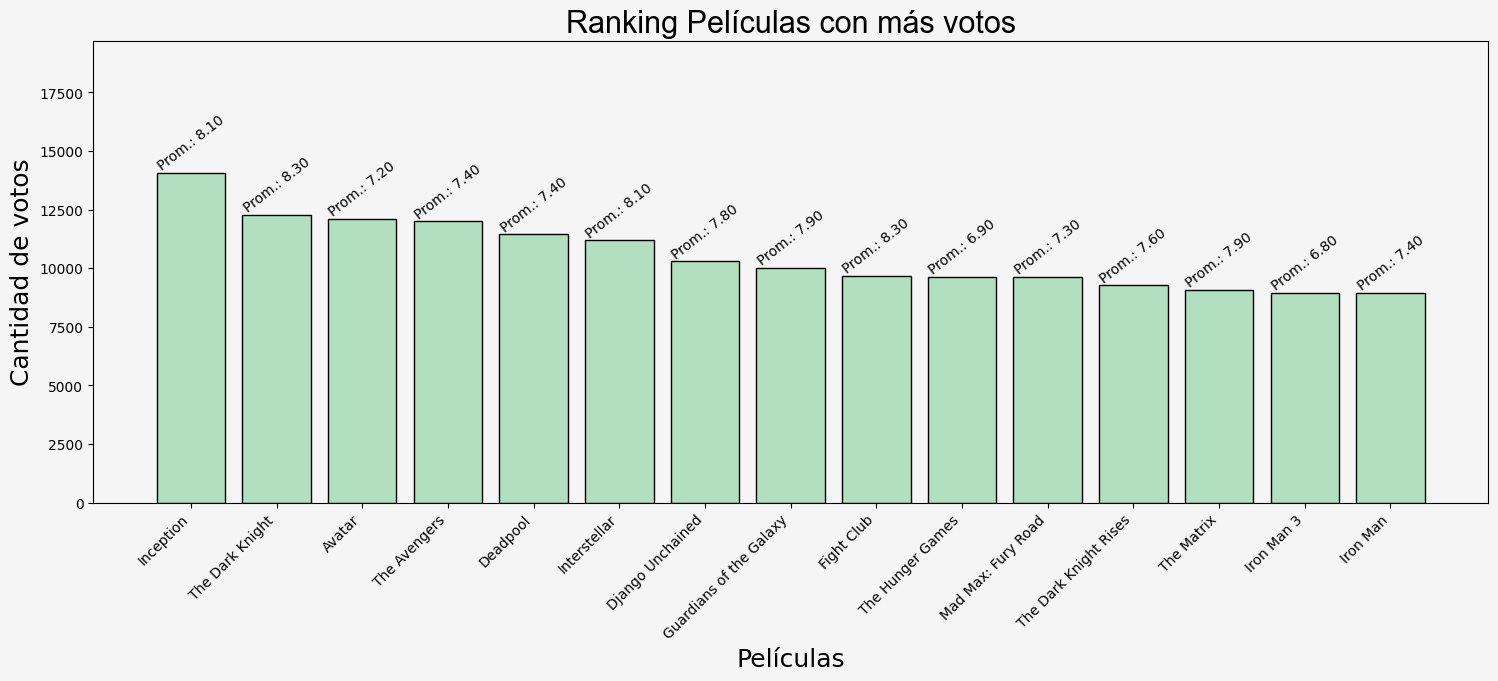

In [69]:
# Ordenar el DataFrame por recuento de votos en orden descendente
peliculas_votadas = data.sort_values(by='vote_count', ascending=False)

# Obtener las 10 películas con mayor recuento de votos
top_10_votadas = peliculas_votadas.head(15)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(18, 6))

# Definir el color de fondo
color_fondo = '#F5F5F5'  # Gris tenue

# Configurar el color de fondo
fig.patch.set_facecolor(color_fondo)
ax.set_facecolor(color_fondo)

# Definir el color de las barras (verde pastel)
color_barras = '#B2DFBF'

# Crear el gráfico de barras con color verde pastel
ax.bar(top_10_votadas['title'], top_10_votadas['vote_count'], color=color_barras, edgecolor='black')

# Agregar las etiquetas de promedio de voto
for i, (title, vote_count, vote_average) in enumerate(zip(top_10_votadas['title'], top_10_votadas['vote_count'], top_10_votadas['vote_average'])):
    ax.text(title, vote_count, f'Prom.: {vote_average:.2f}', ha='center', va='bottom', rotation=38, color='black')

# Configurar los labels del eje x en diagonal
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Cantidad de votos',fontsize=18)
ax.set_xlabel('Películas',fontsize=18)

# Aumentar el tamaño y el tipo de letra del título
plt.title('Ranking Películas con más votos', fontsize=22, fontname='Arial')

ax.set_ylim(0, top_10_votadas['vote_count'].max() * 1.4)  # Aumentar en un 10% el máximo valor del recuento de votos

# Mostrar el gráfico
plt.show()

In [77]:
# Convertir la columna 'release_date' al tipo de dato 'datetime'
data['release_date'] = pd.to_datetime(data['release_date'])

# Encontrar la película más antigua
pelicula_mas_antigua = data.loc[data['release_date'].idxmin()]
print("Película más antigua:")
print(pelicula_mas_antigua[['title', 'release_date']])

# Encontrar la película más reciente
pelicula_mas_reciente = data.loc[data['release_date'].idxmax()]
print("\nPelícula más reciente:")
print(pelicula_mas_reciente[['title', 'release_date']])



Película más antigua:
title              Passage of Venus
release_date    1874-12-09 00:00:00
Name: 32185, dtype: object

Película más reciente:
title                      Avatar 2
release_date    2020-12-16 00:00:00
Name: 7531, dtype: object


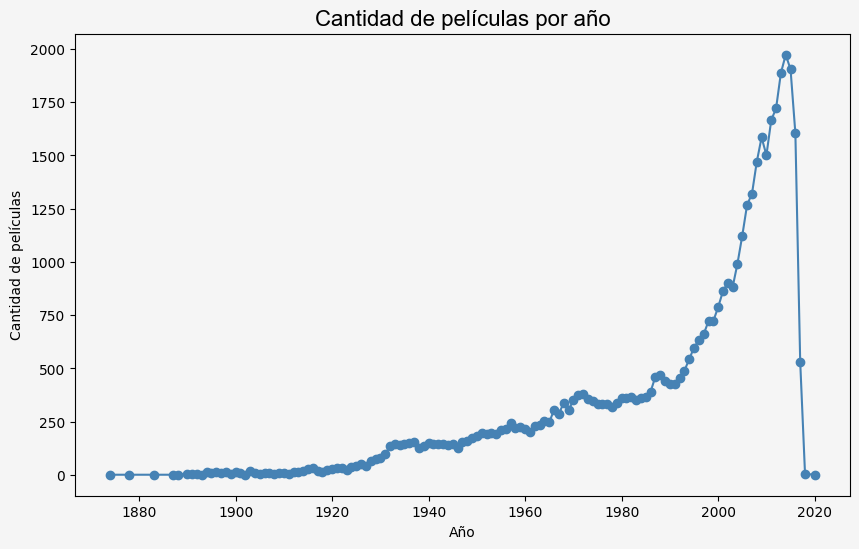

In [79]:

# Obtener el recuento de películas por año
peliculas_por_anio = data['release_date'].dt.year.value_counts().sort_index()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Definir el color de fondo
color_fondo = '#F5F5F5'  # Gris tenue

# Configurar el color de fondo
fig.patch.set_facecolor(color_fondo)
ax.set_facecolor(color_fondo)

# Graficar la cantidad de películas por año
peliculas_por_anio.plot(kind='line', marker='o', color='steelblue')

# Configurar los labels de los ejes
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de películas')

# Aumentar el tamaño y el tipo de letra del título
plt.title('Cantidad de películas por año', fontsize=16, fontname='Arial')

# Mostrar el gráfico
plt.show()

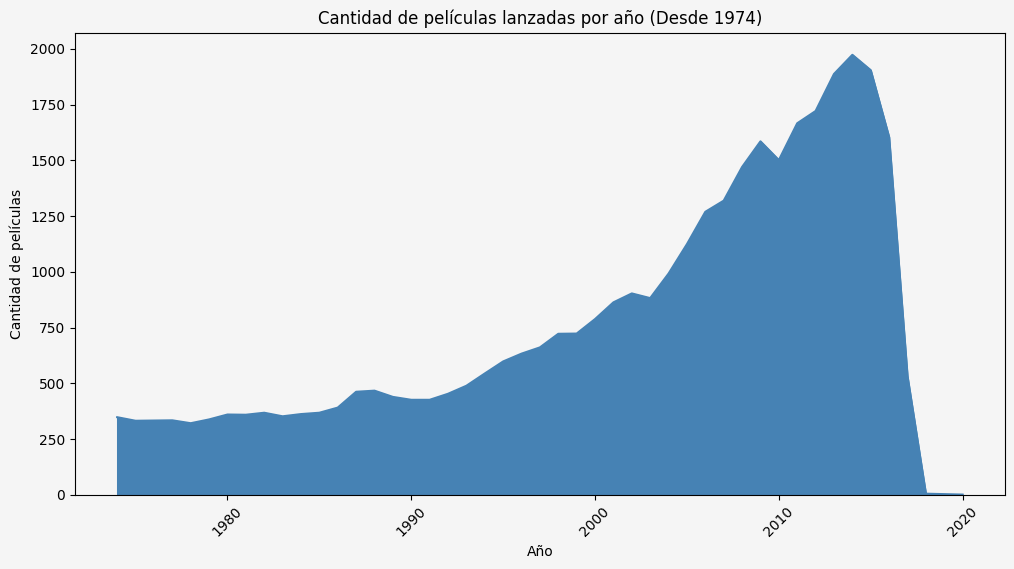

In [93]:
# Filtrar las películas a partir de 1974
df_filtrado = data[data['release_date'].dt.year >= 1974]

# Obtener el recuento de películas por año
count_peliculas_por_año = df_filtrado['release_date'].dt.year.value_counts().sort_index()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Configurar el color de fondo
color_fondo = '#F5F5F5'  # Gris tenue
fig.patch.set_facecolor(color_fondo)
ax.set_facecolor(color_fondo)

# Graficar el recuento de películas por año usando un gráfico de área
count_peliculas_por_año.plot(kind='area', color='steelblue')

# Configurar los labels de los ejes
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de películas')
ax.set_title('Cantidad de películas lanzadas por año (Desde 1974)')

# Ajustar el espaciado entre las marcas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [76]:
# Analizar la distribución de las películas según los días de la semana
data['release_day'] = data['release_date'].dt.day_name()
distribucion_semanal = data['release_day'].value_counts().sort_index()
print("\nDistribución de películas por día de la semana:")
print(distribucion_semanal)


Distribución de películas por día de la semana:
release_day
Friday       13902
Monday        3500
Saturday      5149
Sunday        3608
Thursday      7520
Tuesday       4640
Wednesday     7027
Name: count, dtype: int64


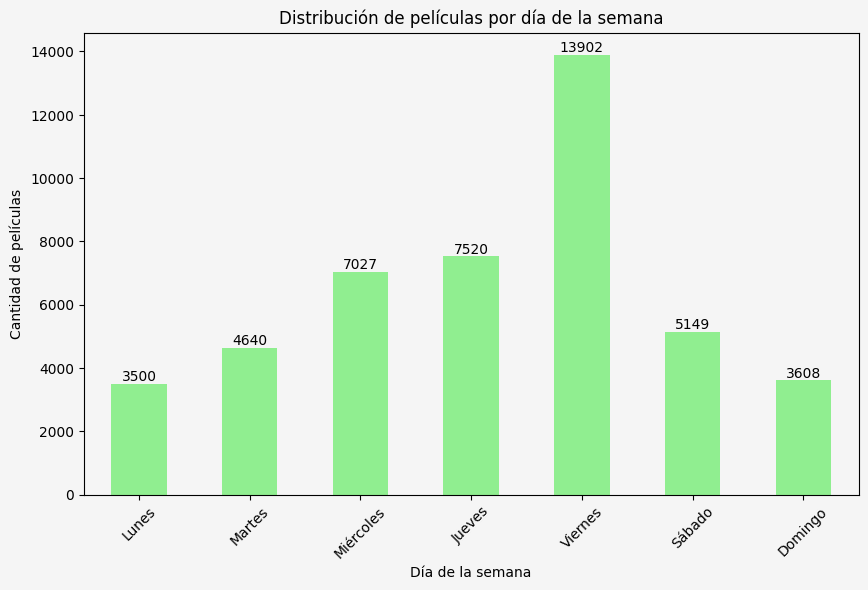

In [101]:
# Convertir la columna 'release_date' al tipo de dato 'datetime'
data['release_date'] = pd.to_datetime(data['release_date'])

# Obtener el nombre del día de la semana en español para cada película
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['release_day'] = data['release_date'].dt.day_name(locale='es_ES').map(dict(zip(nombres_dias_semana, range(7))))

# Calcular la cantidad de películas por día de la semana
distribucion_semanal = data['release_day'].value_counts().sort_index()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar el color de fondo
color_fondo = '#F5F5F5'  # Gris tenue
fig.patch.set_facecolor(color_fondo)
ax.set_facecolor(color_fondo)

# Graficar la cantidad de películas por día de la semana usando un gráfico de barras
barras = distribucion_semanal.plot(kind='bar', color='lightgreen')

# Configurar los labels de los ejes y el título del gráfico
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Cantidad de películas')
ax.set_title('Distribución de películas por día de la semana')

# Configurar las etiquetas del eje x con los nombres de los días de la semana en español
plt.xticks(range(7), nombres_dias_semana, rotation=45)

# Agregar etiquetas de texto a cada barra
for i, v in enumerate(distribucion_semanal):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [109]:
# Asegurarse de que la columna 'release_date' esté en formato de fecha
data['release_date'] = pd.to_datetime(data['release_date'])

# Crear una nueva columna con el mes de la fecha de lanzamiento
data['release_month'] = data['release_date'].dt.month

# Contar la cantidad de películas por mes y ordenar los resultados
recuento_por_mes = data['release_month'].value_counts().sort_index()

# Mapear los números de mes a los nombres correspondientes en español
nombres_meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Cambiar los índices por los nombres de los meses
recuento_por_mes = recuento_por_mes.rename(index=nombres_meses)
recuento_por_mes

release_month
enero         5909
febrero       3028
marzo         3549
abril         3452
mayo          3337
junio         3151
julio         2638
agosto        3393
septiembre    4834
octubre       4613
noviembre     3661
diciembre     3781
Name: count, dtype: int64

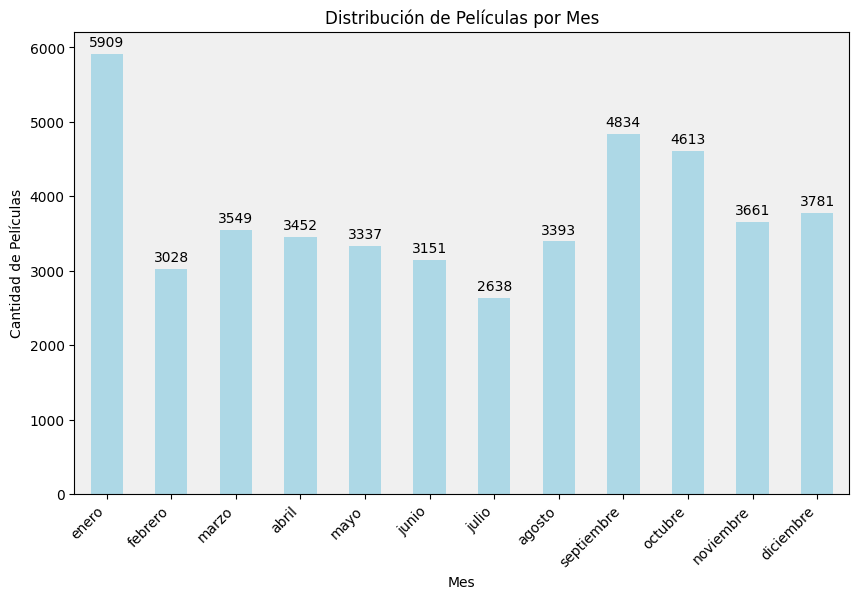

In [113]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar el color de fondo de los ejes
color_fondo = '#f0f0f0'
ax.set_facecolor(color_fondo)

# Graficar la cantidad de películas por mes usando un gráfico de barras
barras = recuento_por_mes.plot(kind='bar', color='lightblue', ax=ax)

# Configurar los labels de los ejes y el título del gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Películas')
ax.set_title('Distribución de Películas por Mes')

# Rotar los labels del eje x
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con las cantidades por mes
for i, v in enumerate(recuento_por_mes):
    ax.text(i, v + 100, str(v), ha='center')

# Mostrar el gráfico
plt.show()

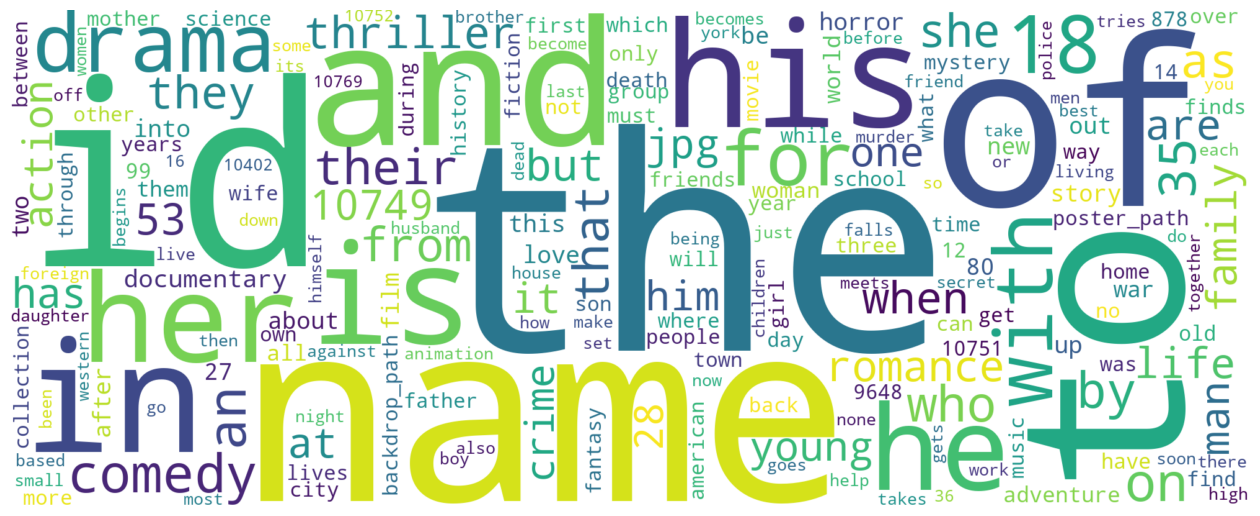

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Concatenar las columnas seleccionadas en un solo texto
text = data['title'].fillna('') + ' ' + data['overview'].fillna('') + ' ' + data['belongs_to_collection'].fillna('') + ' ' + data['genres'].fillna('')

# Crear una instancia de TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text)

# Obtener las palabras más relevantes
feature_names = vectorizer.get_feature_names_out()

# Calcular la importancia de las palabras en el conjunto de datos
word_importance = tfidf_matrix.sum(axis=0).A1

# Crear un diccionario de palabras y su importancia
word_importance_dict = dict(zip(feature_names, word_importance))

# Crear la nube de palabras
wordcloud = WordCloud(width=2000, height=800, background_color='white').generate_from_frequencies(word_importance_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [10]:
data_ML = pd.read_csv('C:\project_mlops\data_ML.csv')

In [11]:
data_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41972 entries, 0 to 41971
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          41972 non-null  object
 1   combined_text  41972 non-null  object
dtypes: object(2)
memory usage: 655.9+ KB


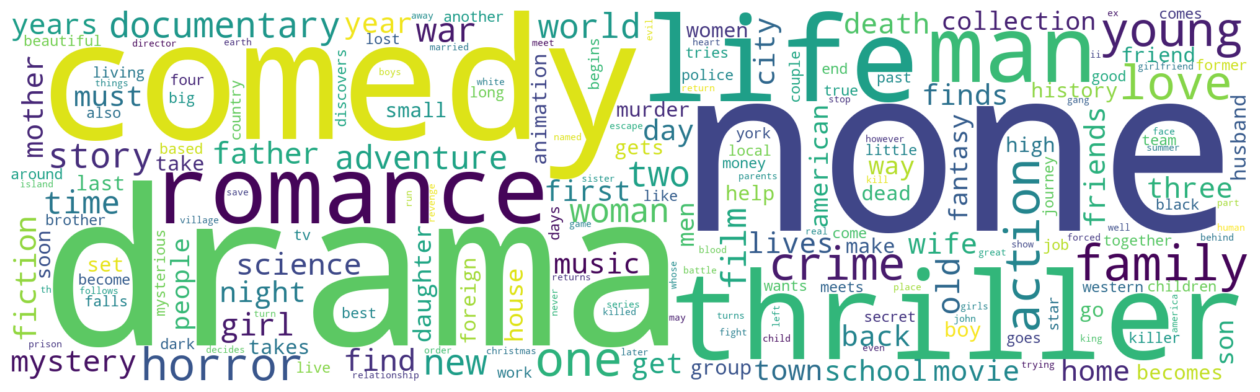

In [19]:
# Concatenar las columnas seleccionadas en un solo texto
text = data_ML['title'].fillna('') + ' ' + data_ML['combined_text'].fillna('')

# Crear una instancia de TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text)

# Obtener las palabras más relevantes
feature_names = vectorizer.get_feature_names_out()

# Calcular la importancia de las palabras en el conjunto de datos
word_importance = tfidf_matrix.sum(axis=0).A1

# Crear un diccionario de palabras y su importancia
word_importance_dict = dict(zip(feature_names, word_importance))

# Crear la nube de palabras
wordcloud = WordCloud(width=2000, height=600, background_color='white').generate_from_frequencies(word_importance_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()